In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis, qso_catalogs_report, get_map, normalize_map, get_weighted_map
from utils_plotting import plot_class_histograms, plot_map, plot_map_stats

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 43)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
catalog_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:12:22.csv')
catalog_non_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:16:30.csv')
catalog = pd.concat([catalog_star, catalog_non_star])

print(catalog_star.shape)
print(catalog_non_star.shape)
print(catalog.shape)

(1147110, 20)
(1545091, 20)
(2692201, 20)


In [6]:
catalog_star['train'] = catalog_star['ID'].isin(kids_x_sdss['ID'])
catalog_non_star['train'] = catalog_non_star['ID'].isin(kids_x_sdss['ID'])
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
qso_catalog_star = catalog_star.loc[catalog_star['CLASS'] == 'QSO']
qso_catalog_non_star = catalog_non_star.loc[catalog_non_star['CLASS'] == 'QSO']

In [9]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [10]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [11]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

In [12]:
print(qso_catalog_star.shape[0])
print(qso_catalog_non_star.shape[0])

148212
11451


In [13]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17107,  6084, 10396]),
 array([50.93339685, 18.11415131, 30.95245184]))

In [14]:
describe_column(kids_x_sdss_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  133,  5634, 10315]),
 array([ 0.82701157, 35.0329561 , 64.14003233]))

In [15]:
describe_column(kids_x_sdss_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([16974,   450,    81]),
 array([96.96658098,  2.57069409,  0.46272494]))

In [16]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1536894,  159663,  995644]),
 array([57.08689656,  5.93057502, 36.98252842]))

In [17]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([990326, 106831, 722752]),
 array([54.4162373 ,  5.87012867, 39.71363403]))

In [18]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([546568,  52832, 272892]),
 array([62.65883443,  6.05668744, 31.28447813]))

In [19]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  5652, 148212, 993246]),
 array([ 0.49271648, 12.9204697 , 86.58681382]))

In [20]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1531242,   11451,    2398]),
 array([99.10367739,  0.7411214 ,  0.15520121]))

# Photo catalogs

In [30]:
qso_catalogs_report(catalog, save=True)

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1536894,  159663,  995644]), array([57.08689656,  5.93057502, 36.98252842]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog x KiDS size: 19930
QSO catalog x KiDS catalog size: 15005, train elements: 3035
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  748, 12935,  1322]), array([ 4.985005  , 86.20459847,  8.81039653]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog x KiDS size: 22368
QSO catalog x KiDS catalog size: 15990, train elements: 3430
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  423, 14537,  1030]), array([ 2.64540338, 90.91307067,  6.44152595]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog x KiDS size: 70749
QSO catalog x KiDS catalog size: 37377, train elements: 5899
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3489, 28393,  5495]), array([ 9.33461755, 75.96382802, 14.70155443]))


In [51]:
qso_catalogs_report(catalog_star)

Catalog size: 1147110
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  5652, 148212, 993246]), array([ 0.49271648, 12.9204697 , 86.58681382]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 13944, train elements: 2987
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   59, 12568,  1317]), array([ 0.42312106, 90.1319564 ,  9.44492255]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 15374, train elements: 3380
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  118, 14231,  1025]), array([ 0.7675296 , 92.56537011,  6.6671003 ]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 33385, train elements: 5772
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  375, 27547,  5463]), array([ 1.12325895, 82.51310469, 16.36363636]))


In [52]:
qso_catalogs_report(catalog_non_star)

Catalog size: 1545091
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1531242,   11451,    2398]), array([99.10367739,  0.7411214 ,  0.15520121]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 1061, train elements: 48
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([689, 367,   5]), array([64.93873704, 34.59000943,  0.47125353]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 616, train elements: 50
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([305, 306,   5]), array([49.51298701, 49.67532468,  0.81168831]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 3992, train elements: 127
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3114,  846,   32]), array([78.00601202, 21.19238477,  0.80160321]))


# Standalone bands

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


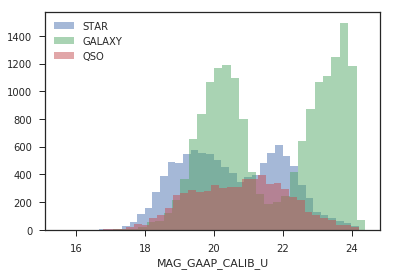

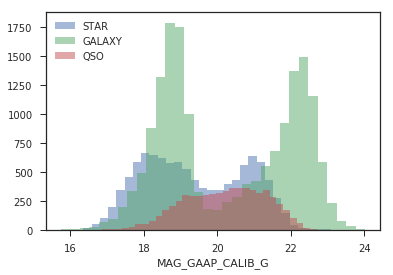

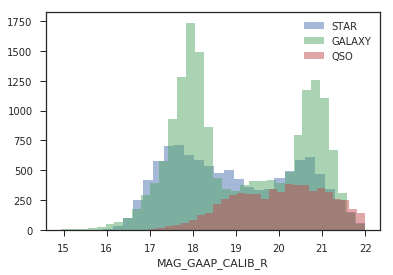

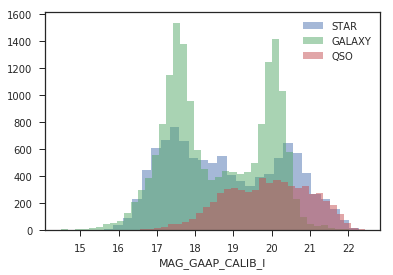

In [20]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


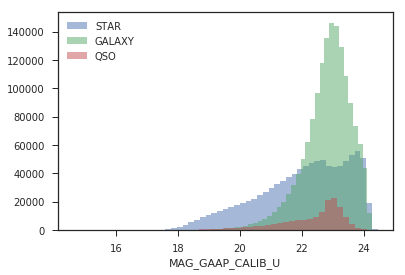

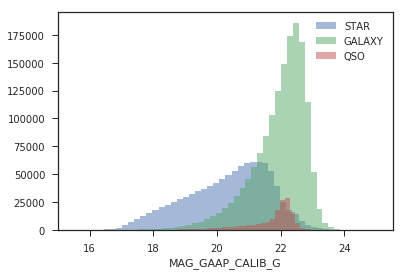

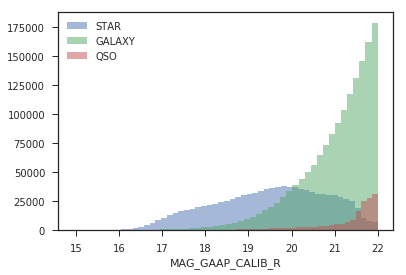

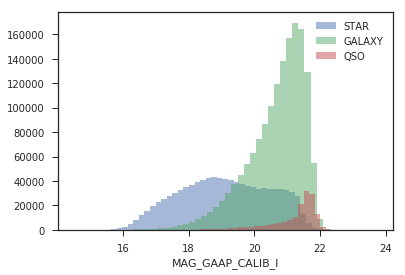

In [21]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


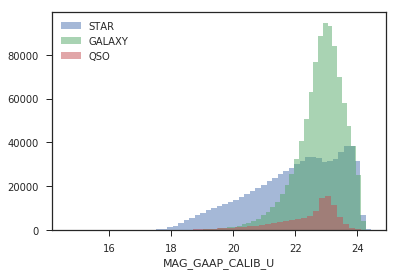

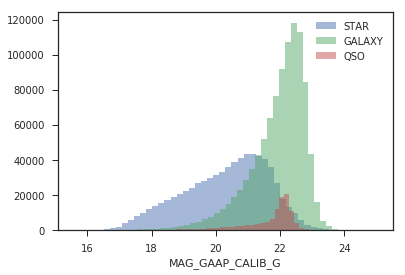

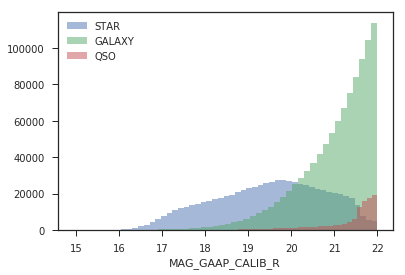

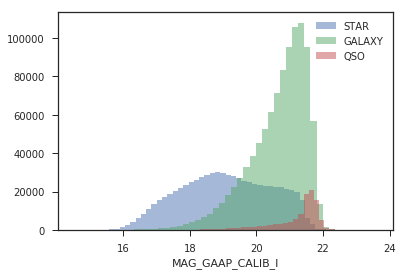

In [22]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


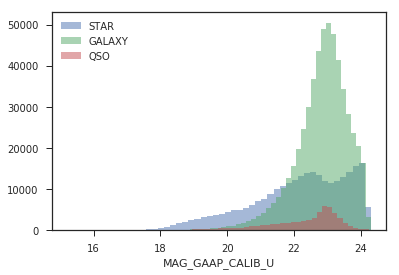

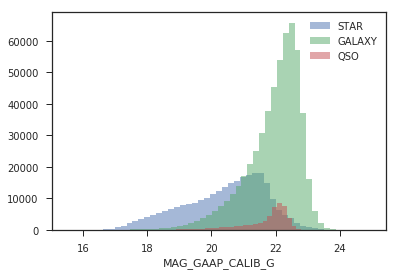

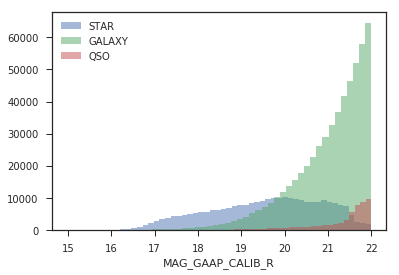

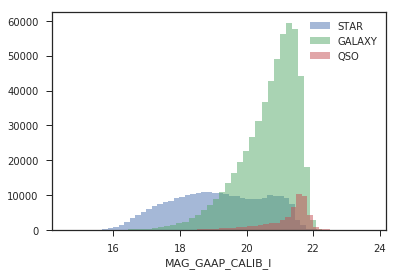

In [23]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

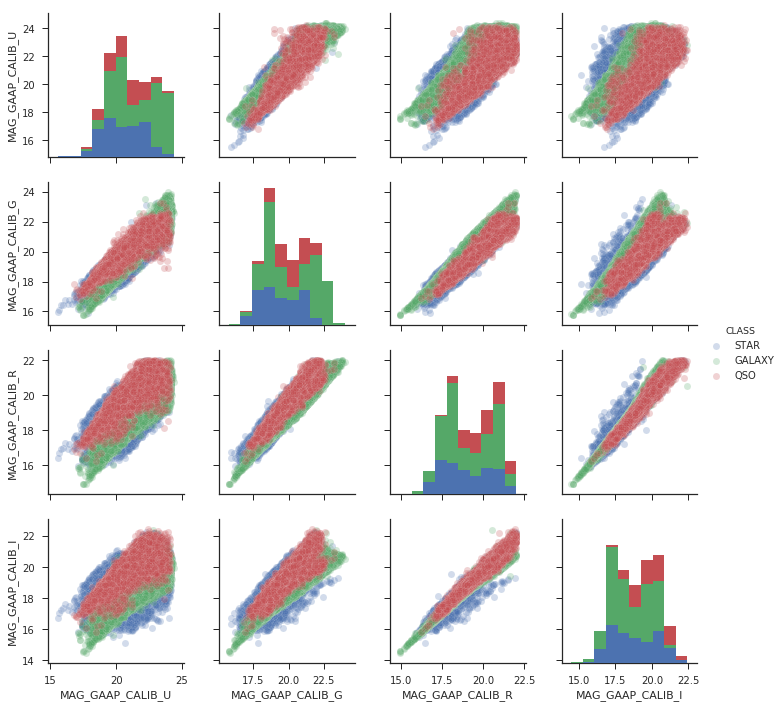

In [24]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

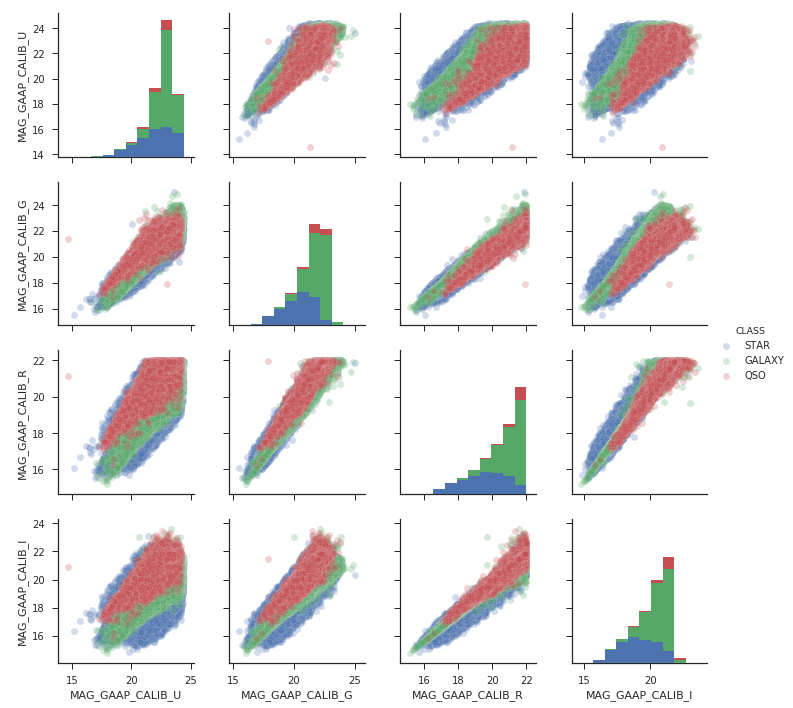

In [25]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


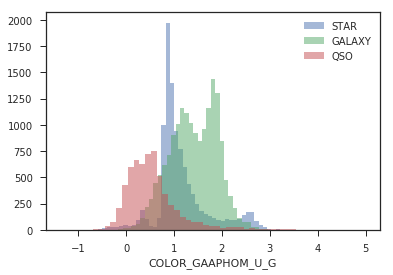

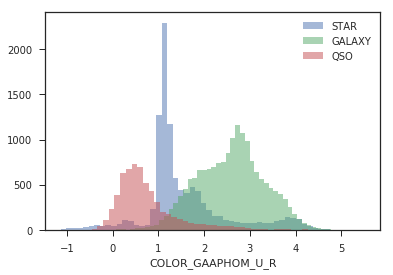

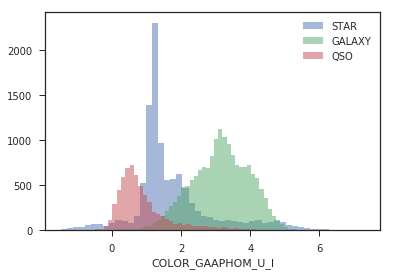

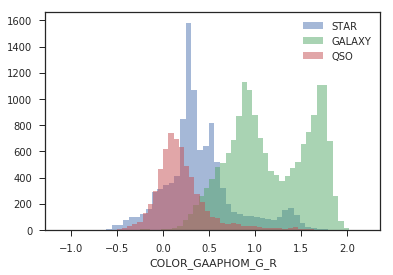

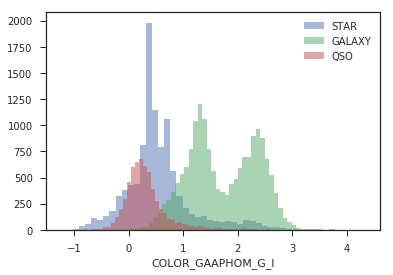

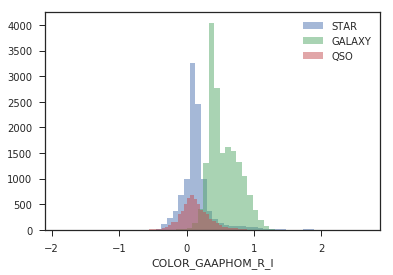

In [26]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


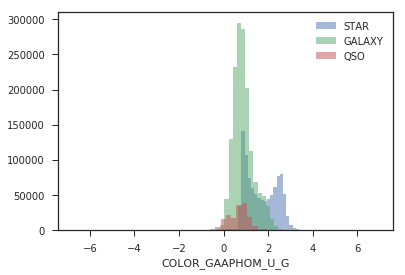

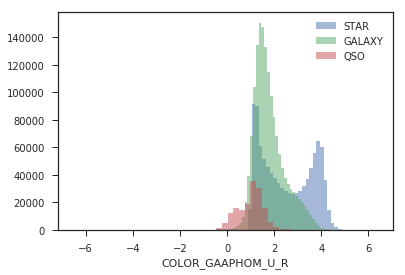

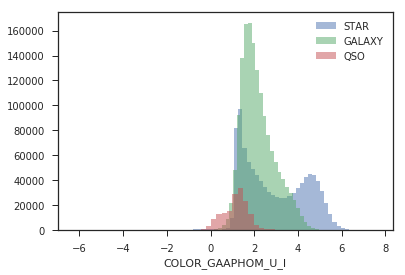

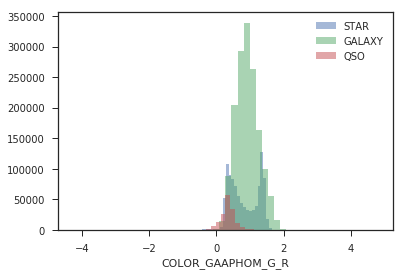

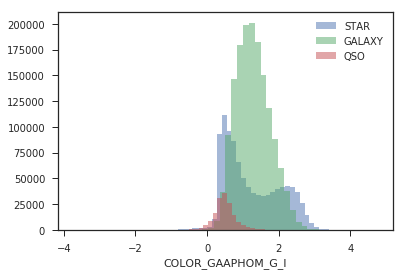

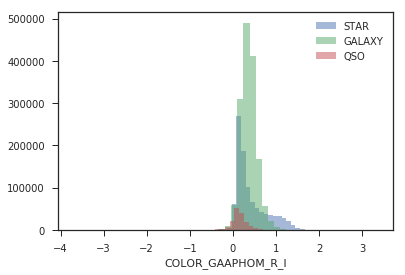

In [27]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

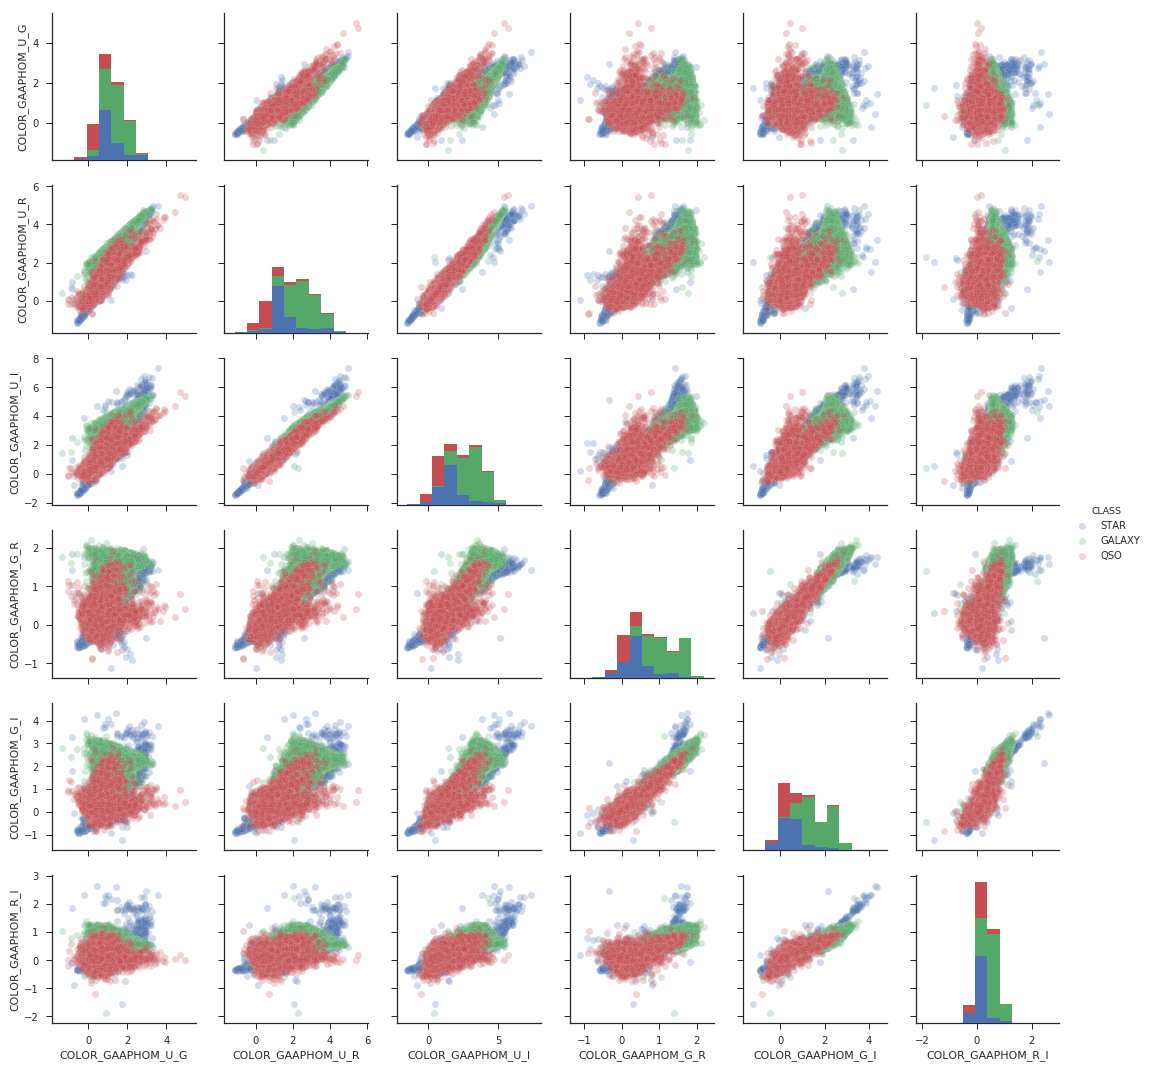

In [28]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

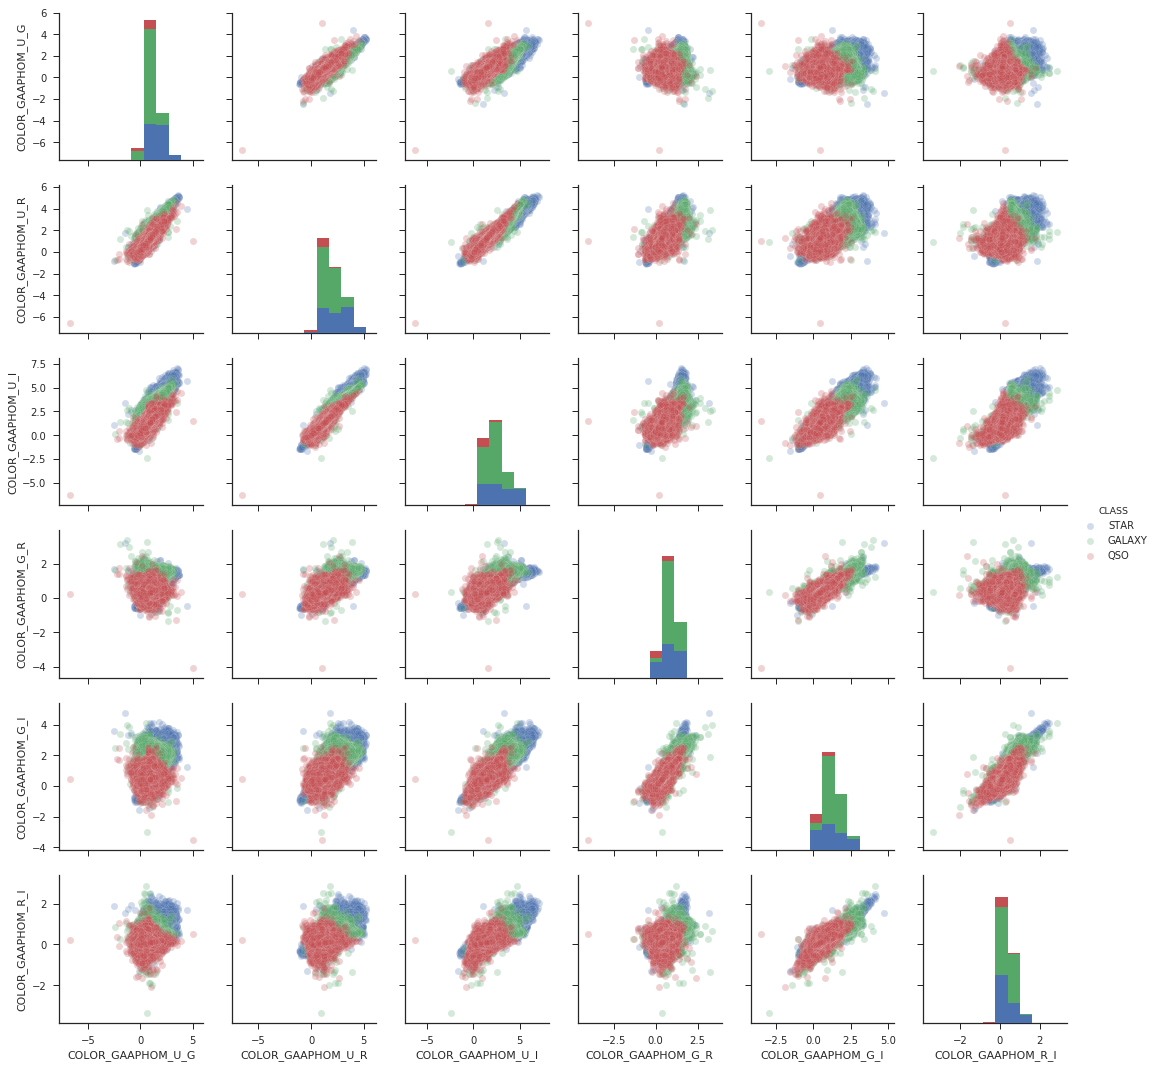

In [29]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

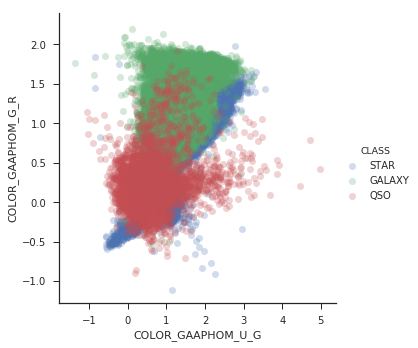

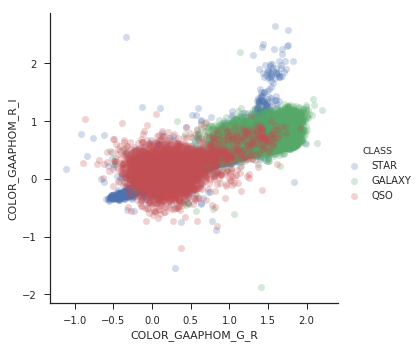

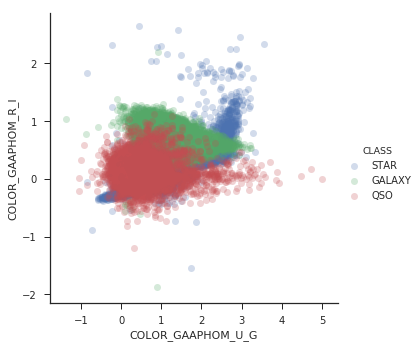

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

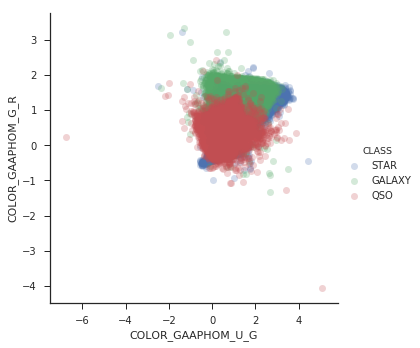

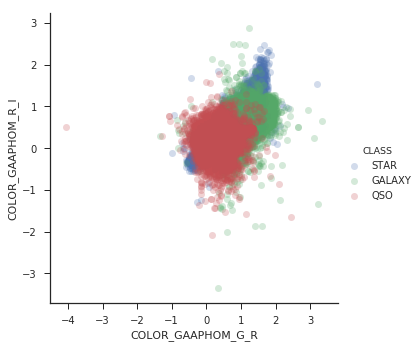

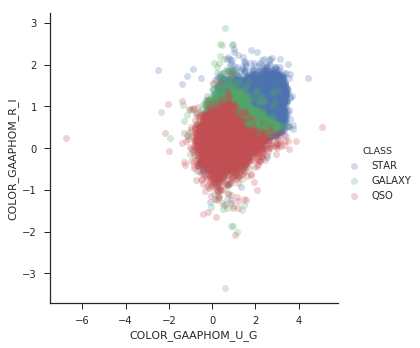

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

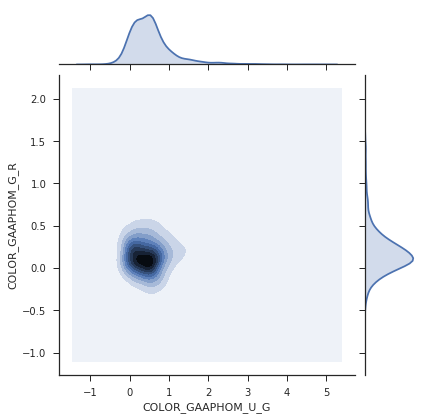

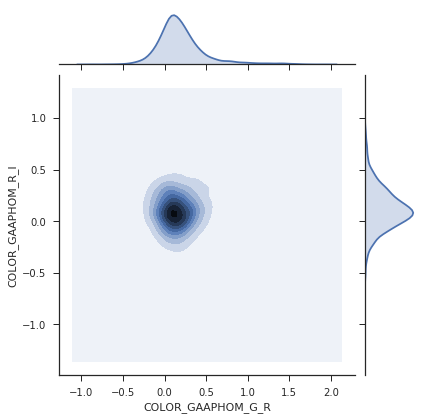

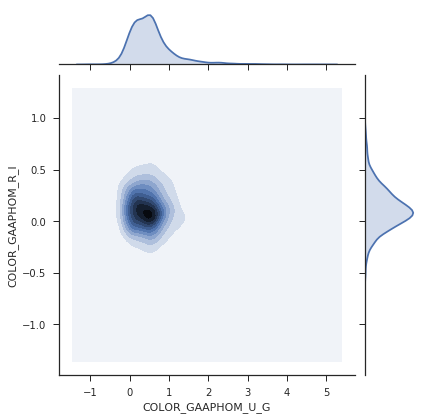

In [32]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

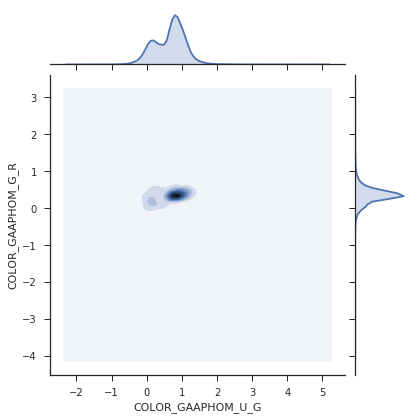

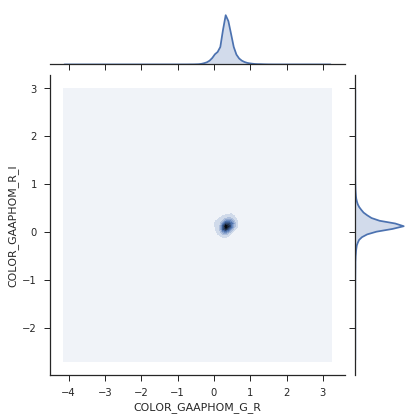

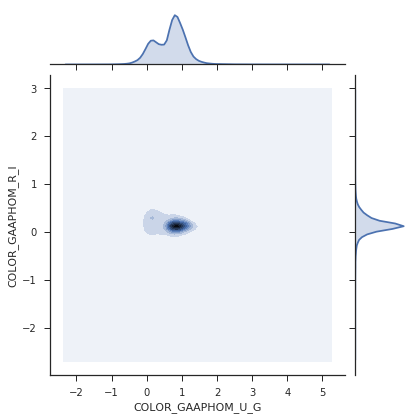

In [33]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

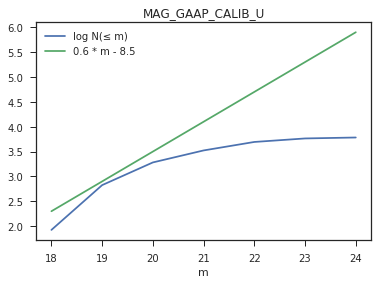

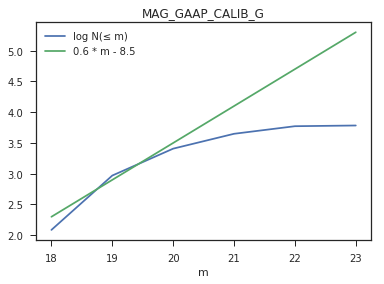

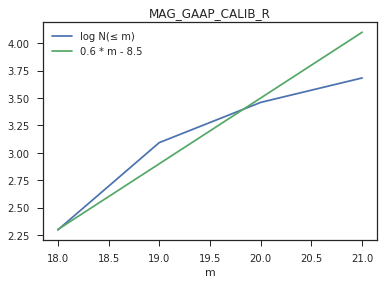

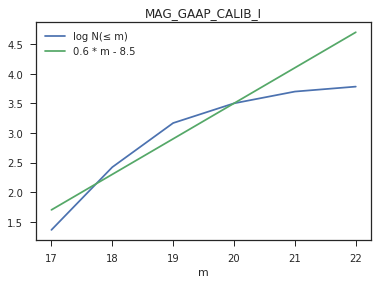

In [34]:
number_count_analysis(qso_kids_sdss, c=8.5)

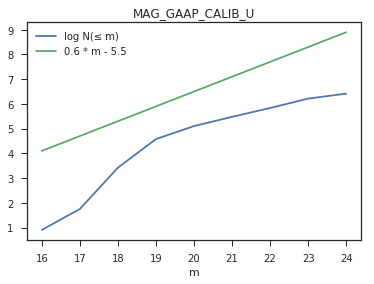

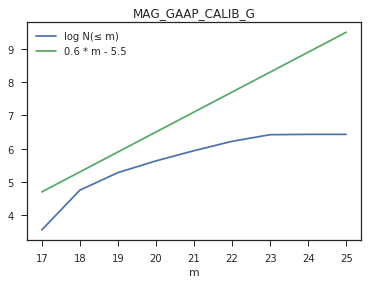

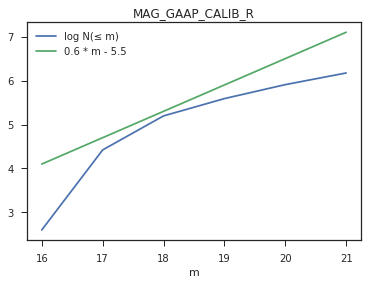

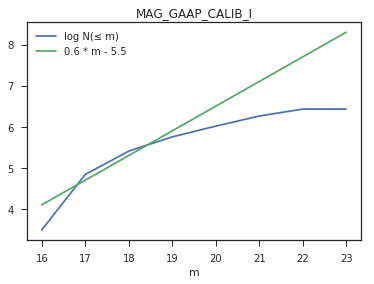

In [35]:
number_count_analysis(catalog, c=5.5)

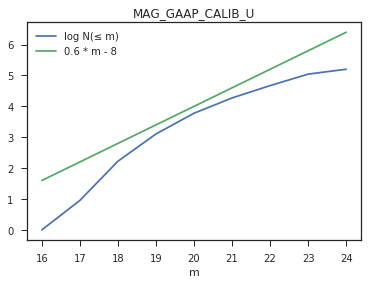

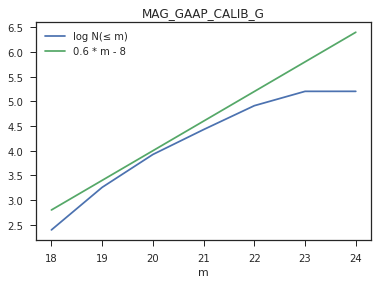

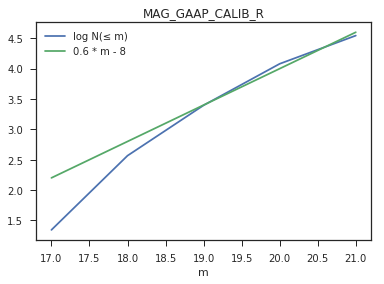

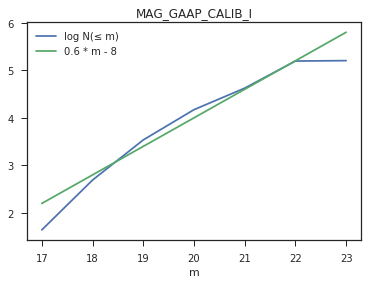

In [36]:
number_count_analysis(qso_catalog, c=8)

# Maps

<IPython.core.display.Javascript object>


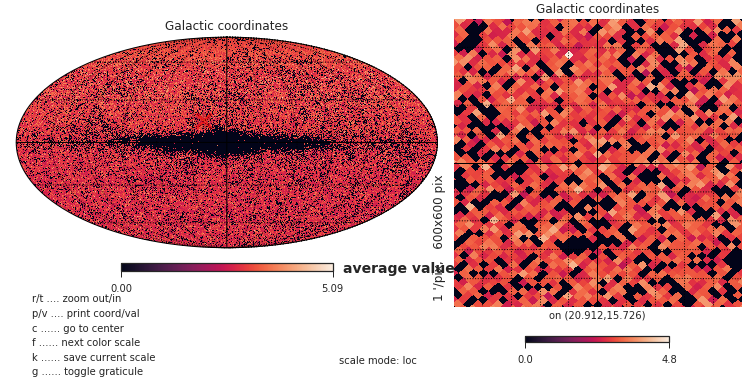

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [19]:
%matplotlib notebook
map_stars, lon_stars, lat_stars = get_weighted_map(nside=256)
plot_map(map_stars, unit='average value per pixel', is_cmap=False)

<IPython.core.display.Javascript object>


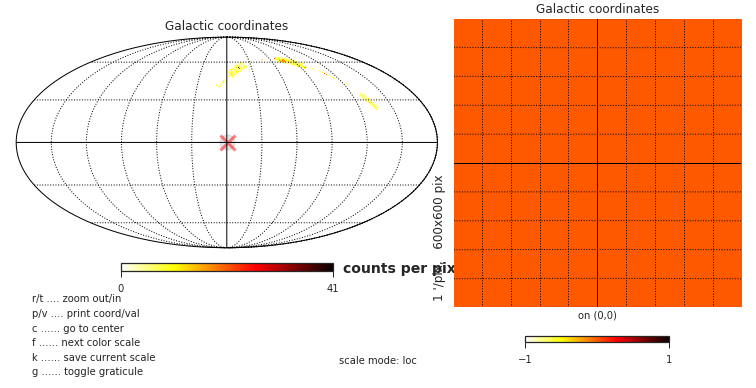

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [47]:
%matplotlib notebook
m, lon, lat = get_map(kids_x_sdss['GAL_LONG'], kids_x_sdss['GAL_LAT'], nside=256)
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


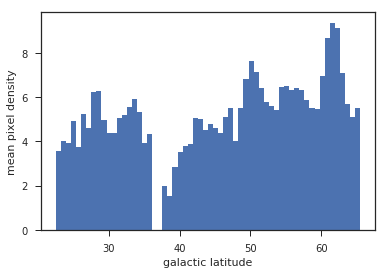

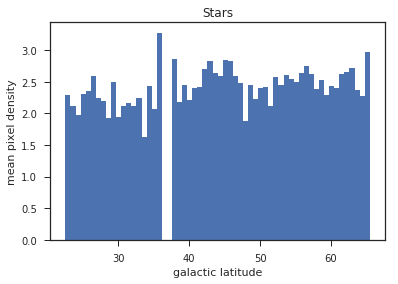

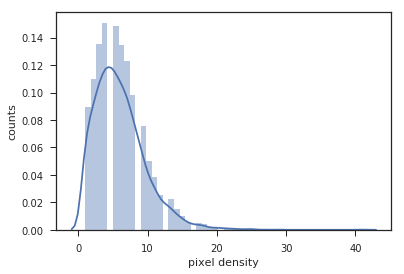

In [27]:
%matplotlib inline
plot_map_stats(m, lat, map_stars)

<IPython.core.display.Javascript object>


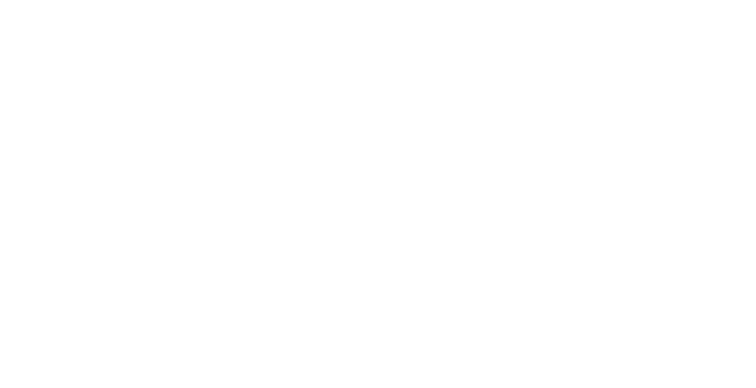

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


<IPython.core.display.Javascript object>


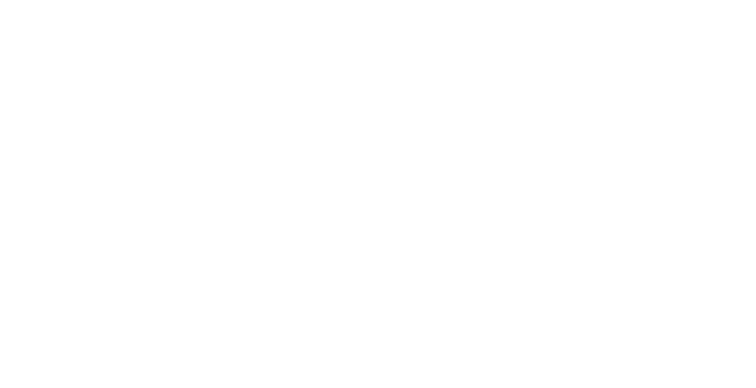

In [28]:
%matplotlib notebook
m, lon, lat = get_map(qso_kids_sdss['GAL_LONG'], qso_kids_sdss['GAL_LAT'], nside=256)
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


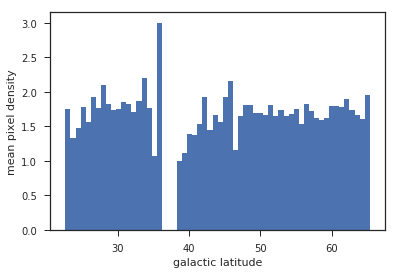

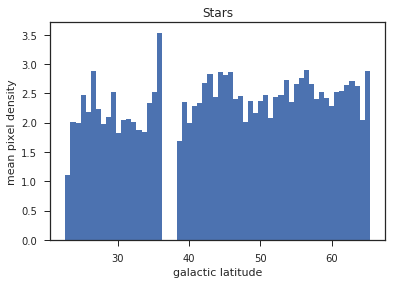

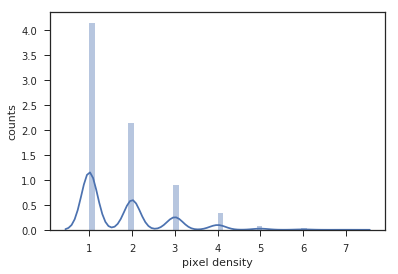

In [29]:
%matplotlib inline
plot_map_stats(m, lat, map_stars)

<IPython.core.display.Javascript object>


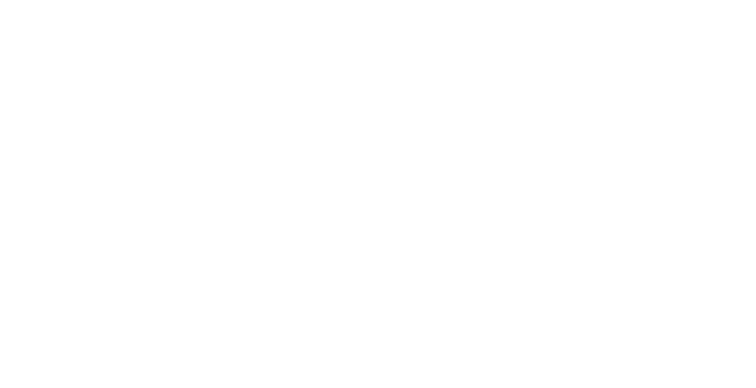

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


<IPython.core.display.Javascript object>


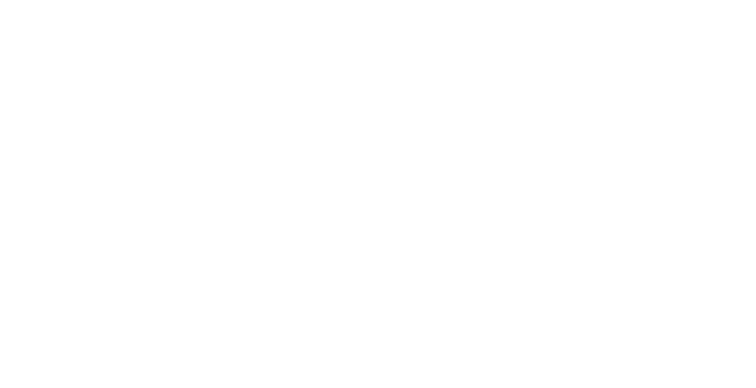

In [30]:
%matplotlib notebook
map_catalog, lon, lat = get_map(catalog['GAL_LONG'], catalog['GAL_LAT'], nside=256)
plot_map(map_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


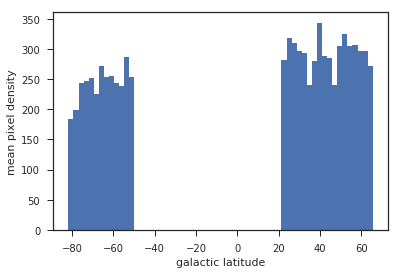

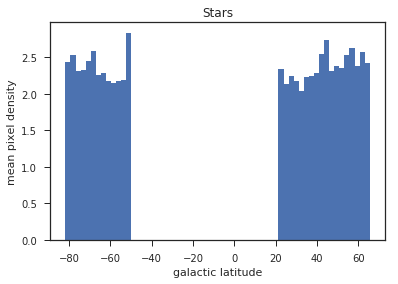

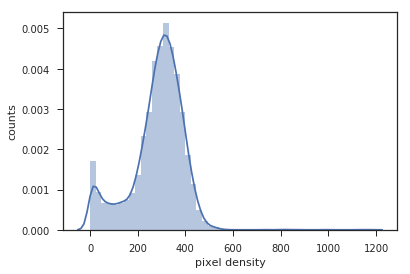

In [32]:
%matplotlib inline
plot_map_stats(map_catalog, lat, map_stars)

<IPython.core.display.Javascript object>


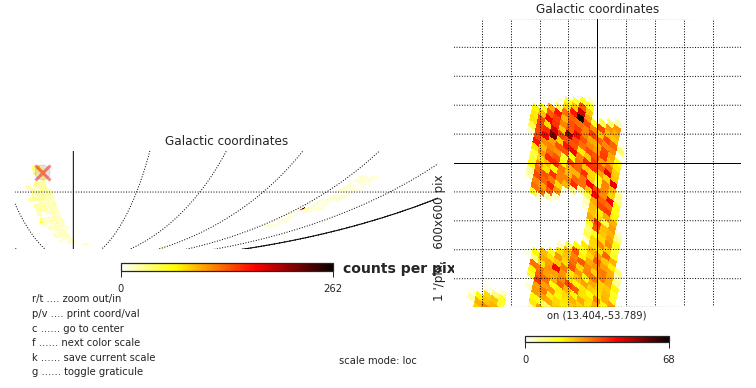

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [48]:
%matplotlib notebook
map_qso_catalog, lon, lat = get_map(qso_catalog['GAL_LONG'], qso_catalog['GAL_LAT'], nside=256)
plot_map(map_qso_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


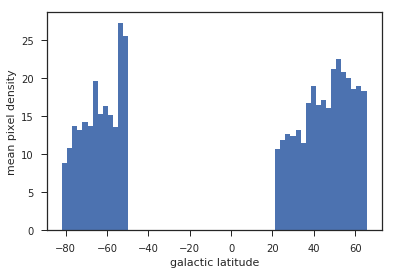

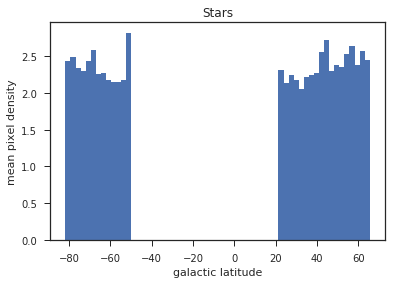

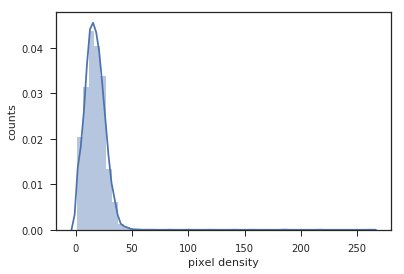

In [34]:
%matplotlib inline
plot_map_stats(map_qso_catalog, lat, map_stars)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


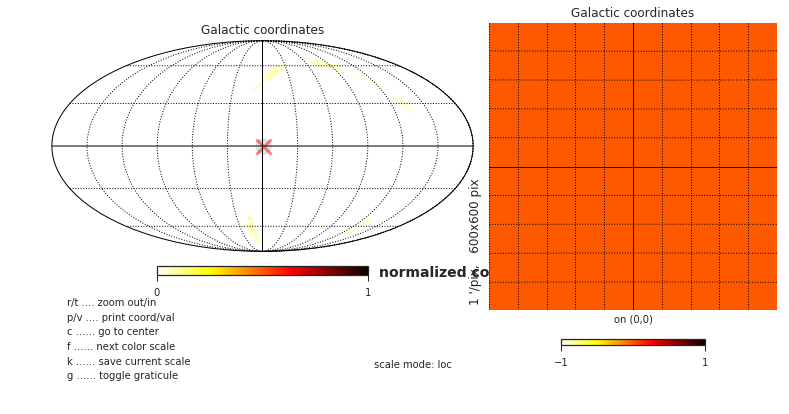

In [35]:
map_normalized = normalize_map(map_qso_catalog, map_catalog)
plot_map(map_normalized, unit='normalized counts per pixel')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


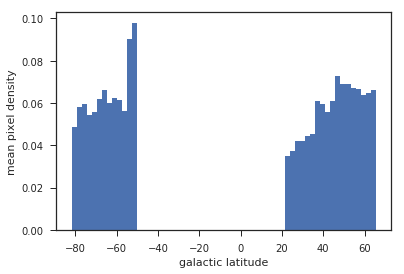

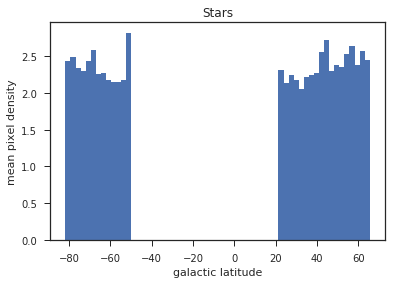

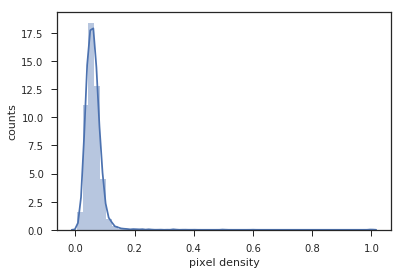

In [36]:
%matplotlib inline
plot_map_stats(map_normalized, lat, map_stars)

<IPython.core.display.Javascript object>


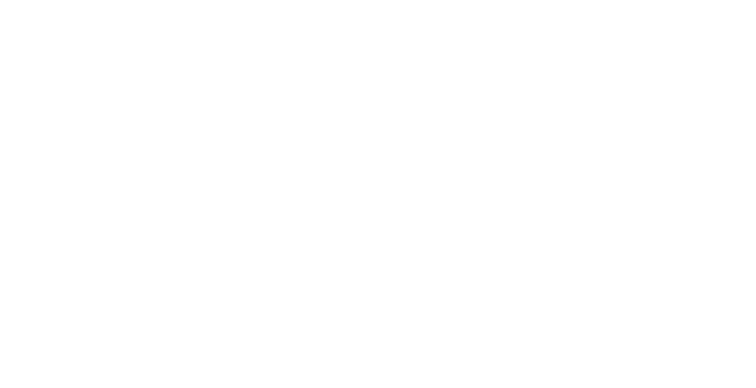

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


<IPython.core.display.Javascript object>


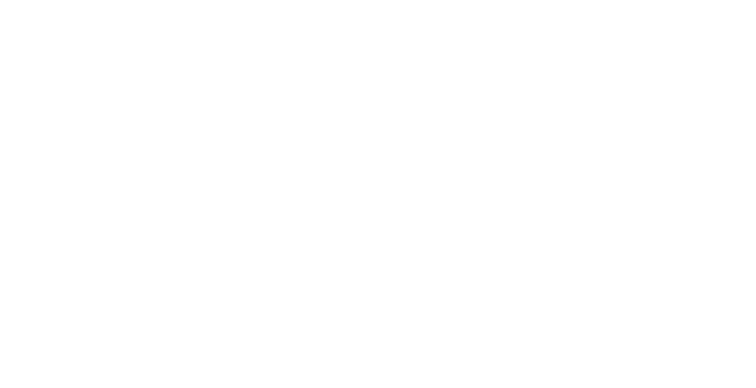

In [41]:
%matplotlib notebook
m, lon, lat = get_map(qso_catalog_non_star['GAL_LONG'], qso_catalog_non_star['GAL_LAT'], nside=256)
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


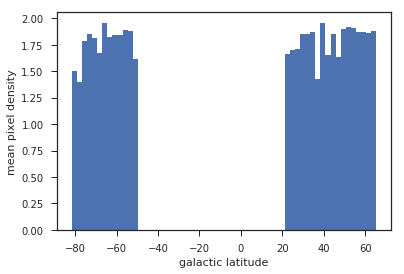

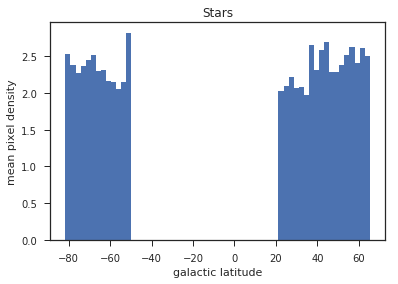

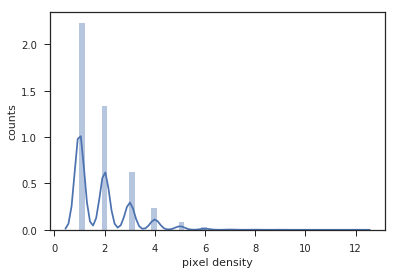

In [42]:
%matplotlib inline
plot_map_stats(m, lat, map_stars)

# CLASS_STAR

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


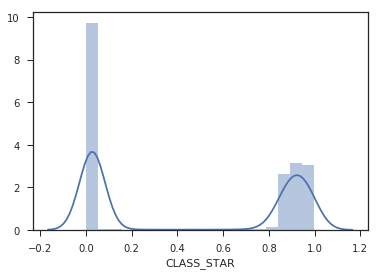

In [45]:
sns.distplot(kids_x_sdss['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


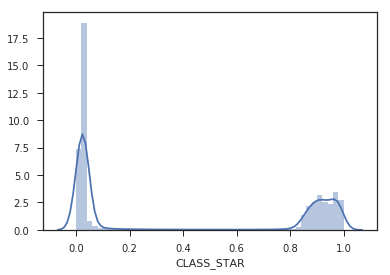

In [46]:
sns.distplot(catalog['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


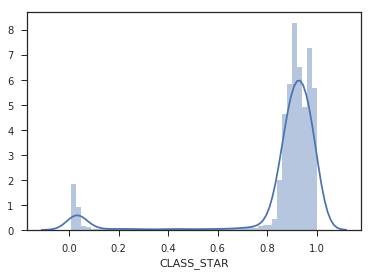

In [47]:
sns.distplot(qso_kids_sdss['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


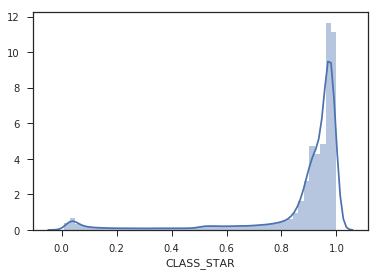

In [48]:
sns.distplot(qso_catalog['CLASS_STAR'])

## Color-color plots

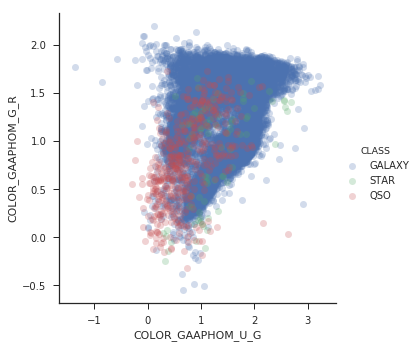

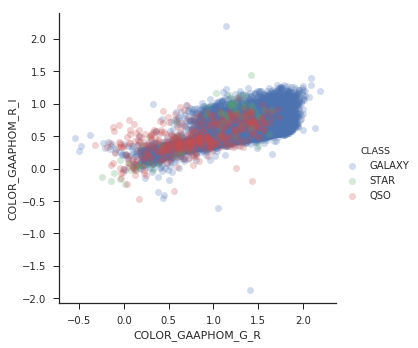

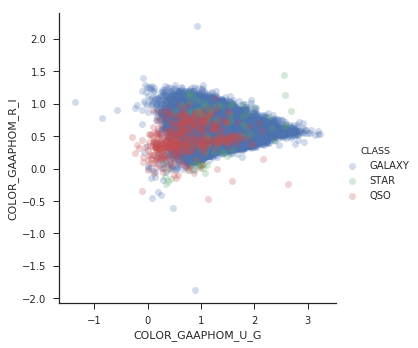

In [49]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

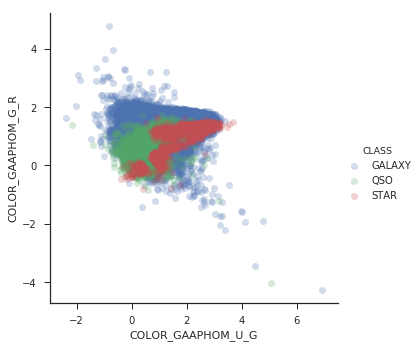

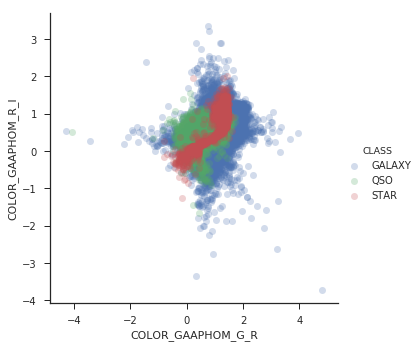

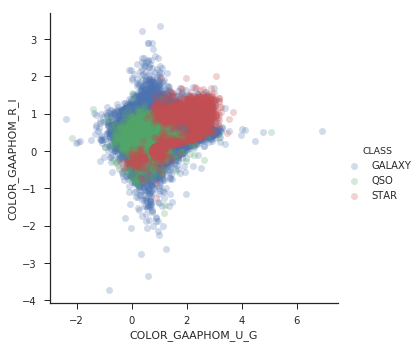

In [50]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

# Predictions

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


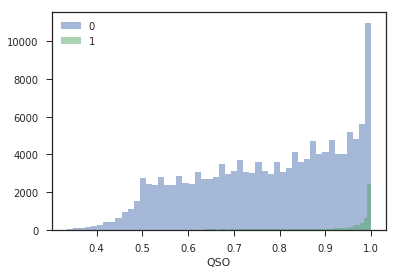

In [43]:
for t in [0, 1]:
    sns.distplot(catalog_star.loc[(catalog_star['train'] == t) & (catalog_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


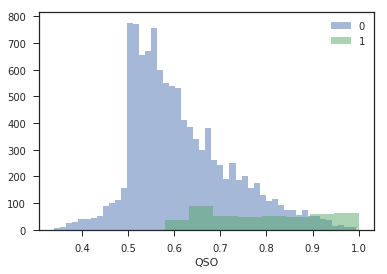

In [44]:
for t in [0, 1]:
    sns.distplot(catalog_non_star.loc[(catalog_non_star['train'] == t) & (catalog_non_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()